In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d=pd.read_csv("diabetes.csv")
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75,64,24,55,29.7,0.370,33,0
1996,8,179,72,42,130,32.7,0.719,36,1
1997,6,85,78,0,0,31.2,0.382,42,0
1998,0,129,110,46,130,67.1,0.319,26,1


In [3]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["log2", "sqrt",None],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
x=d.drop('Outcome',axis=1)
y=d['Outcome']

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.5s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.6s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=   5.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators

In [4]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [5]:
#rs_clf.fit(x_train, y_train)


In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
x = d.drop("Outcome",axis=1)
y=d["Outcome"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)
#clf = RandomForestClassifier()
clf1=RandomForestClassifier(n_estimators=1200,min_samples_split=6,min_samples_leaf=4,max_features='sqrt',max_depth=30)

cvs=cross_val_score(clf1,x,y, cv=10)

In [7]:
np.mean(cvs)

0.953

In [8]:
print(f"Diabetes Classifier Cross-Validated Accuracy: {np.mean(cvs) *100:.2f}%")

Diabetes Classifier Cross-Validated Accuracy: 95.30%


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [10]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[1.  , 0.  ],
        [0.01, 0.99],
        [0.97, 0.03],
        [0.76, 0.24],
        [1.  , 0.  ],
        [0.15, 0.85],
        [0.06, 0.94],
        [0.84, 0.16],
        [0.97, 0.03],
        [0.01, 0.99]]),
 400)

In [11]:
ypp= y_probs[:,1]
ypp[:10]

array([0.  , 0.99, 0.03, 0.24, 0.  , 0.85, 0.94, 0.16, 0.03, 0.99])

In [12]:
fpr,tpr,thresholds=roc_curve(y_test,ypp)
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01145038, 0.01145038, 0.01145038, 0.01145038, 0.01145038,
       0.01145038, 0.02671756, 0.02671756, 0.02671756, 0.02671756,
       0.02671756, 0.03053435, 0.03816794, 0.04198473, 0.04198473,
       0.04580153, 0.05343511, 0.0648855 , 0.06870229, 0.08778626,
       0.09541985, 0.09923664, 0.12977099, 0.14122137, 0.17175573,
       0.19083969, 0.20229008, 0.22900763, 0.23664122, 0.28244275,
       0.29770992, 0.30152672, 0.31679389, 0.36641221, 0.39312977,
       0.44274809, 0.54198473, 0.66793893, 0.80152672, 1.        ])

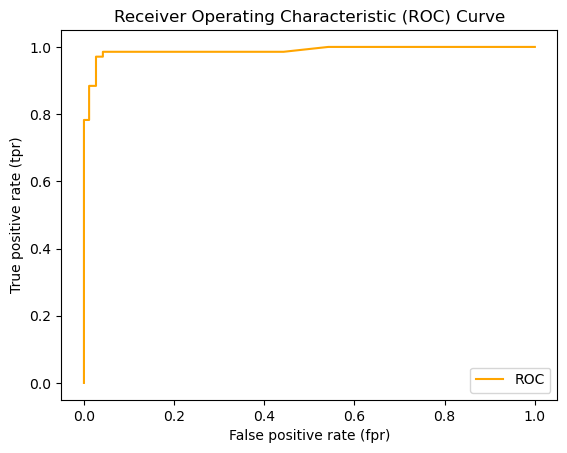

In [13]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color="orange",label="ROC")
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate (tpr)")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [14]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, ypp)

0.9887708817347052

In [15]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)

confusion_matrix(y_test, y_preds)

array([[255,   7],
       [  7, 131]], dtype=int64)

In [16]:
pd.crosstab(y_test, 
            y_preds, 
            rownames=["Actual Label"], 
            colnames=["Predicted Label"])

Predicted Label,0,1
Actual Label,,
0,255,7
1,7,131


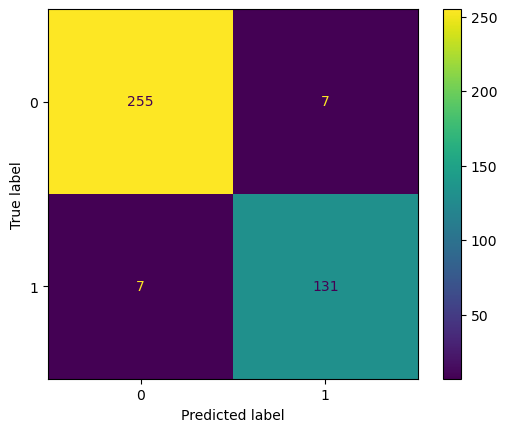

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       262
           1       0.95      0.95      0.95       138

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



In [19]:
import pickle
pickle.dump(clf,open("diabetesdp.pkl","wb"))

In [20]:
loaded_pickle_model = pickle.load(open("diabetesdp.pkl", "rb"))

In [21]:
loaded_pickle_model.predict([[4,99,68,38,0,32.8,0.145,33]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [22]:
loaded_pickle_model.predict([[7,195,70,33,145,25.1,0.163,55]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [23]:
loaded_pickle_model.predict([[10,75,82,0,0,33.3,0.263,38]])


C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [24]:
loaded_pickle_model.predict([[2,117,90,19,71,25.2,0.313,21]])

C:\Users\Asus\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)